In [1]:
import pandas as pd

In [15]:
df_excel = pd.read_excel("C:/Users/Salomão/Downloads/Chess.xlsx", sheet_name = "Chess")#sheet name = nome da planilha dento do arquivo excel

In [25]:
df_excel.head(2)

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply
0,False,1.504210e+17,1.504210e+17,13,outoftime,white,15+2,bourgris,1500,a-00,1191,D10,Slav Defense: Exchange Variation,5
1,True,1.504130e+17,1.504130e+17,16,resign,black,5+10,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense: Kennedy Variation,4


In [19]:
df_csv = pd.read_csv("C:/Users/Salomão/Downloads/Tomato.csv", sep = ",")

In [23]:
df_csv.head(2)

,Date,Unit,Minimum,Maximum,Average,Market
0,2013-06-16,Kg,26,32,29.0,Tomato
1,2013-06-17,Kg,20,25,22.5,Tomato


In [29]:
df_csv.tail()

,Date,Unit,Minimum,Maximum,Average,Market
2736,2021-05-09,Kg,10,15,12.5,Tomato
2737,2021-05-10,Kg,10,15,12.5,Tomato
2738,2021-05-11,Kg,10,15,12.5,Tomato
2739,2021-05-12,Kg,30,35,32.5,Tomato
2740,2021-05-13,Kg,35,40,37.5,Tomato


In [31]:
df_csv.shape

(2741, 6)

In [33]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rated           20058 non-null  bool   
 1   created_at      20058 non-null  float64
 2   last_move_at    20058 non-null  float64
 3   turns           20058 non-null  int64  
 4   victory_status  20058 non-null  object 
 5   winner          20058 non-null  object 
 6   increment_code  20058 non-null  object 
 7   white_id        20058 non-null  object 
 8   white_rating    20058 non-null  int64  
 9   black_id        20058 non-null  object 
 10  black_rating    20058 non-null  int64  
 11  opening_eco     20058 non-null  object 
 12  opening_name    20058 non-null  object 
 13  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 2.0+ MB


In [37]:
df_csv.describe().T

,count,mean,std,min,25%,50%,75%,max
Minimum,2741.0,35.089748,16.648425,8.0,22.0,30.0,45.0,115.0
Maximum,2741.0,41.281284,17.364135,12.0,30.0,38.0,50.0,120.0
Average,2741.0,38.185516,16.970949,10.0,25.0,35.0,47.5,117.5


In [41]:
set(df_excel["victory_status"])#indica os dados em uma coluna categórica

{'draw', 'mate', 'outoftime', 'resign'}

In [43]:
def categorizar_tomate_media(media):
    if media >= 40 and media <= 70:
        return "tomate medio" 
    elif  media < 40:
        return "tomate pequeno"
    else:
        return "tomate grande"

In [45]:
df_csv["categoria_tomate"] = df_csv["Average"].apply(categorizar_tomate_media)

In [47]:
df_csv.head(2)

,Date,Unit,Minimum,Maximum,Average,Market,categoria_tomate
0,2013-06-16,Kg,26,32,29.0,Tomato,tomate pequeno
1,2013-06-17,Kg,20,25,22.5,Tomato,tomate pequeno


In [49]:
df_csv.groupby(["categoria_tomate"]).describe()

Minimum                                                      \
                   count       mean       std   min   25%   50%   75%    max   
categoria_tomate                                                               
tomate grande      149.0  75.744966  7.324666  65.0  70.0  75.0  80.0  115.0   
tomate medio       954.0  47.818658  8.203065  30.0  40.0  45.0  55.0   65.0   
tomate pequeno    1638.0  23.978022  7.175572   8.0  18.0  25.0  30.0   38.0   

                 Maximum             ...              Average             \
                   count       mean  ...   75%    max   count       mean   
categoria_tomate                     ...                                   
tomate grande      149.0  82.583893  ...  85.0  120.0   149.0  79.164430   
tomate medio       954.0  55.009434  ...  60.0   75.0   954.0  51.414046   
tomate pequeno    1638.0  29.528694  ...  35.0   44.0  1638.0  26.753358   

                                                           
                       std   min   25%   50%   75%    max  
categoria_tomate                                           
tomate grande     7.367396  70.5  75.0  77.5  82.5  117.5  
tomate medio      8.272792  40.0  45.0  50.0  57.5   70.0  
tomate pequeno    7.191735  10.0  21.5  27.5  32.5   39.5  

[3 rows x 24 columns]

In [51]:
filtro = df_csv["Average"] < 40
df_csv.loc[filtro]

,Date,Unit,Minimum,Maximum,Average,Market,categoria_tomate
0,2013-06-16,Kg,26,32,29.0,Tomato,tomate pequeno
1,2013-06-17,Kg,20,25,22.5,Tomato,tomate pequeno
2,2013-06-18,Kg,22,26,24.0,Tomato,tomate pequeno
3,2013-06-19,Kg,24,28,26.0,Tomato,tomate pequeno
4,2013-06-20,Kg,22,26,24.0,Tomato,tomate pequeno
...,...,...,...,...,...,...,...
2736,2021-05-09,Kg,10,15,12.5,Tomato,tomate pequeno
2737,2021-05-10,Kg,10,15,12.5,Tomato,tomate pequeno
2738,2021-05-11,Kg,10,15,12.5,Tomato,tomate pequeno
2739,2021-05-12,Kg,30,35,32.5,Tomato,tomate pequeno


In [53]:
import numpy as np

In [55]:
arr_list = np.array([1,2,3,4,5,6,7,8])

In [57]:
print(arr_list)

[1 2 3 4 5 6 7 8]


In [59]:
arr_zeros = np.zeros((4,6))
print(arr_zeros)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [65]:
arr_random = np.random.rand(3,4)
print(arr_random)#valores aleatórios de 0 a 1

[[0.92023501 0.13385189 0.5743822  0.00842155]
 [0.70402205 0.27336282 0.32113598 0.05983276]
 [0.39759171 0.4470587  0.19808429 0.70046031]]


In [69]:
arr_random.shape

(3, 4)

In [73]:
arr_random_reshape =  arr_random.reshape((4,3))
print(arr_random_reshape)

[[0.92023501 0.13385189 0.5743822 ]
 [0.00842155 0.70402205 0.27336282]
 [0.32113598 0.05983276 0.39759171]
 [0.4470587  0.19808429 0.70046031]]


In [75]:
arr1 = np.array([[1,2],[3,4]])
arr2 = np.array([[5,6],[7,8]])
arr3 = np.array([[9,10],[11,12]])

In [77]:
arr1

array([[1, 2],
       [3, 4]])

In [79]:
arr4 = np.concatenate((arr1,arr2,arr3),axis = 1)

In [81]:
arr4

array([[ 1,  2,  5,  6,  9, 10],
       [ 3,  4,  7,  8, 11, 12]])

In [83]:
 arr4_split = np.split(arr4, 2)

In [85]:
 arr4_split

[array([[ 1,  2,  5,  6,  9, 10]]), array([[ 3,  4,  7,  8, 11, 12]])]

In [87]:
arr4_transpose = arr4.transpose()

In [89]:
arr4_transpose

array([[ 1,  3],
       [ 2,  4],
       [ 5,  7],
       [ 6,  8],
       [ 9, 11],
       [10, 12]])

In [91]:
arr4_rev = arr4_transpose.T

In [93]:
arr4_rev

array([[ 1,  2,  5,  6,  9, 10],
       [ 3,  4,  7,  8, 11, 12]])

In [95]:
arr_a = np.array([1,7,27])
arr_b = np.array([1,5,1])

In [97]:
arr_a_b = np.add(arr_a,arr_b)

In [99]:
arr_a_b 

array([ 2, 12, 28])

In [101]:
 arr_sub_a_b = np.subtract(arr_a,arr_b)

In [103]:
 arr_sub_a_b

array([ 0,  2, 26])

In [107]:
df_csv["Date"] = pd.to_datetime(df_csv["Date"])

In [109]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2741 non-null   datetime64[ns]
 1   Unit              2741 non-null   object        
 2   Minimum           2741 non-null   int64         
 3   Maximum           2741 non-null   int64         
 4   Average           2741 non-null   float64       
 5   Market            2741 non-null   object        
 6   categoria_tomate  2741 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 150.0+ KB


In [111]:
import matplotlib.pyplot as plt

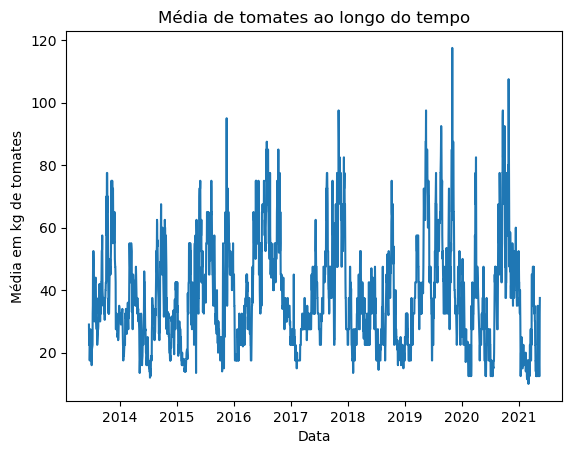

In [115]:
plt.plot(df_csv["Date"],df_csv["Average"])
plt.xlabel("Data")
plt.ylabel("Média em kg de tomates")
plt.title("Média de tomates ao longo do tempo")
plt.show()

In [117]:
df_excel.head()

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply
0,False,1.504210e+17,1.504210e+17,13,outoftime,white,15+2,bourgris,1500,a-00,1191,D10,Slav Defense: Exchange Variation,5
1,True,1.504130e+17,1.504130e+17,16,resign,black,5+10,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,True,1.504130e+17,1.504130e+17,61,mate,white,5+10,ischia,1496,a-00,1500,C20,King's Pawn Game: Leonardis Variation,3
3,True,1.504110e+17,1.504110e+17,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,D02,Queen's Pawn Game: Zukertort Variation,3
4,True,1.504030e+17,1.504030e+17,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,C41,Philidor Defense,5


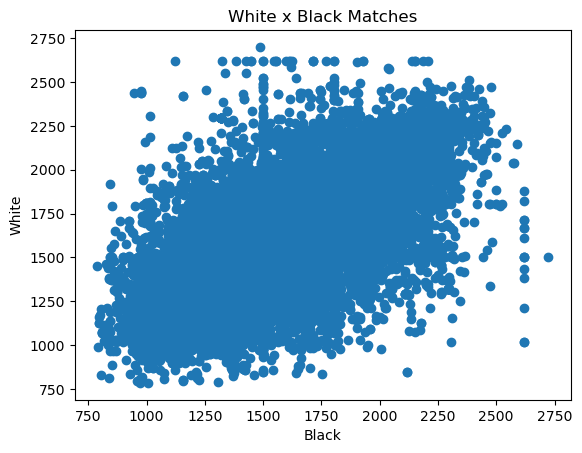

In [121]:
plt.scatter(df_excel["black_rating"],df_excel["white_rating"])
plt.xlabel("Black")
plt.ylabel("White")
plt.title("White x Black Matches")
plt.show()

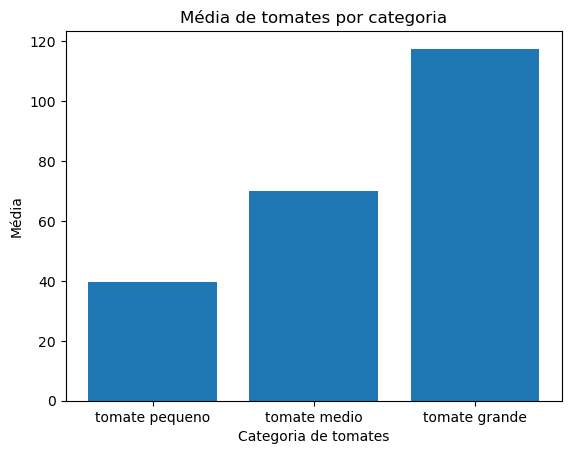

In [125]:
plt.bar(df_csv["categoria_tomate"],df_csv["Average"])
plt.xlabel("Categoria de tomates")
plt.ylabel("Média")
plt.title("Média de tomates por categoria")
plt.show()

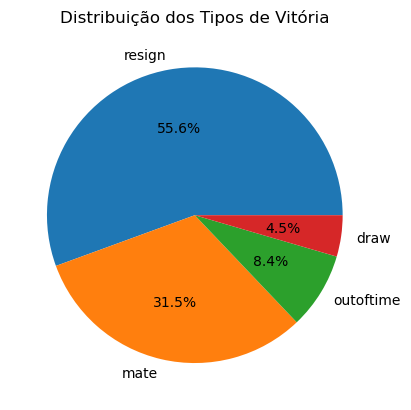

In [135]:
# Conta a frequência de cada tipo de vitória
victory_counts = df_excel["victory_status"].value_counts()

# Gera o gráfico de pizza
victory_counts.plot(kind="pie", autopct="%1.1f%%")

# Exibe o gráfico
plt.ylabel('')  # Remove o rótulo do eixo Y para um visual mais limpo
plt.title('Distribuição dos Tipos de Vitória')
plt.show()

In [137]:
df_diabetes = pd.read_csv("C:/Users/Salomão/Downloads/diabetes.csv", sep = ",")

In [143]:
df_diabetes.head(2)

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [145]:
from sklearn.model_selection import train_test_split

In [149]:
x = df_diabetes.drop(["Class variable"], axis = 1)

In [153]:
y = df_diabetes["Class variable"]

In [155]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Class variable, Length: 768, dtype: int64

In [157]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)#30% dos dados para teste e o restante para treinamento

In [161]:
len(x_train)

537

In [163]:
df_diabetes.shape

(768, 9)

In [165]:
from sklearn.neighbors import KNeighborsClassifier

In [167]:
knn = KNeighborsClassifier(n_neighbors=3)

In [169]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [171]:
accuracy = knn.score(x_test,y_test)

In [173]:
accuracy

0.7012987012987013